In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams
import pandas as pd

plt.style.use('ggplot')
rcParams['font.family'] = 'serif'
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 250
rcParams['lines.linewidth'] = 0.5
rcParams['lines.markersize'] = 1.5
rcParams['errorbar.capsize'] = 1.5
rcParams['figure.constrained_layout.use'] = True
rcParams['figure.figsize'] = [1.61803398875 * 6, 6]

In [10]:
def variance(array):
    '''
    Input:
        Array of measured quantity over time (ie avereage number of infected for SIRS)
    Return:
        The variance of that array
    '''
    return np.average(np.square(array)) - np.square(np.average(array))

def average(array):
    return np.average(array)
def bootstrap(array, function, y):
    '''
    Bootstrap error method calculation
    for a function y = f(x)
    Input:
        array = Array corresponding to x (ie the average number of Infected sites throughout the simulation)
        function = Funtion corresponding to f(x)
        y = calculated values from the data (ie the Variance in Infected sites for SIRS)
    Return:
        An array of the errors of in the input array (ie input = varriance in Infected, return is the error in the variance)
    '''
    c_i = np.zeros(array.shape[0])

    for k in range(array.shape[0]):
        array_removed = np.delete(array, k)


        c_i[k] = function(array_removed)

    return np.sqrt(np.sum((c_i - function(array))**2, axis = 0))

In [11]:
files = os.listdir('/Users/achillequarante/Desktop/output-sirs/')
prob_i_df = pd.DataFrame(index=range(len(files)), columns = ['p1', 'p3', 'avg_i', 'var_i'])
for i, file in enumerate(files):
    array = np.load(f"/Users/achillequarante/Desktop/output-sirs/{file}")/2500
    prob_i_df.iloc[i]['avg_i'] = float(np.average(array))
    prob_i_df.iloc[i]['p1'] = float(file.split('.npy')[0].split('-')[-2])
    prob_i_df.iloc[i]['p3'] = float(file.split('.npy')[0].split('-')[-1])
    prob_i_df.iloc[i]['var_i'] = float((variance(array))/2500)

In [12]:
prob_i_df = prob_i_df.sort_values(by=['p1', 'p3'])
prob_i_df

,p1,p3,avg_i,var_i
939,0.0,0.0,0.0,0.0
975,0.0,0.02,0.0,0.0
651,0.0,0.04,0.0,0.0
956,0.0,0.06,0.0,0.0
1804,0.0,0.08,0.0,0.0
...,...,...,...,...
1200,1.0,0.92,0.47151,0.0
858,1.0,0.94,0.475444,0.0
750,1.0,0.96,0.478489,0.0
1689,1.0,0.98,0.481318,0.0


In [13]:
prob_i_df['avg_i'].unique()

array([0.0, 2.8e-06, 3.2000000000000003e-06, ..., 0.4784892, 0.4813184,
       0.48398120000000006], dtype=object)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


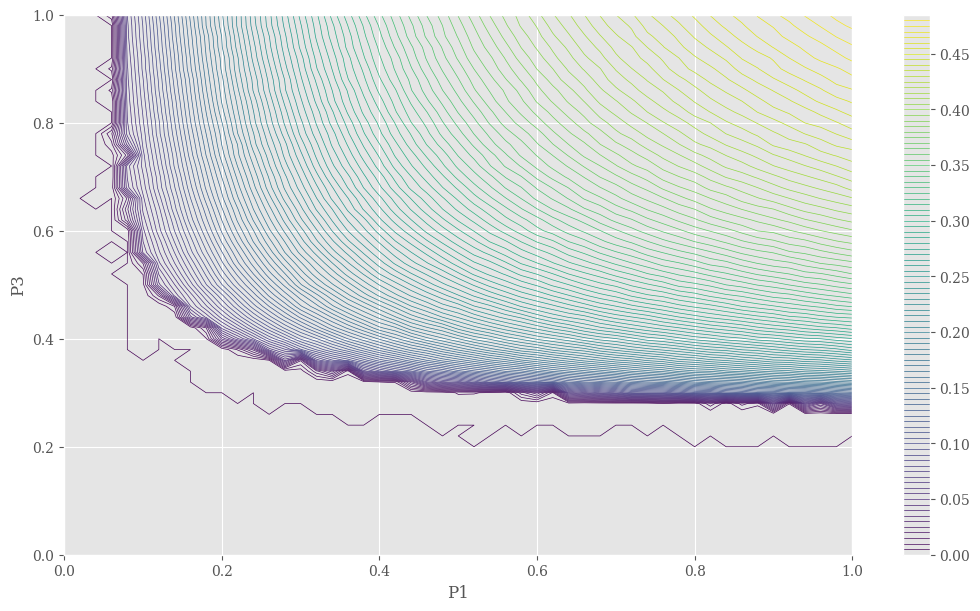

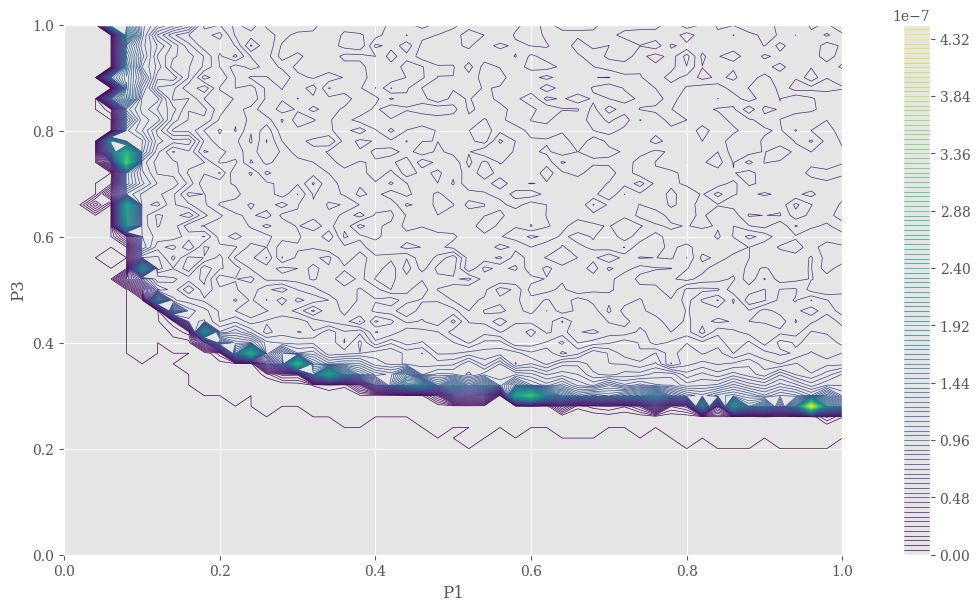

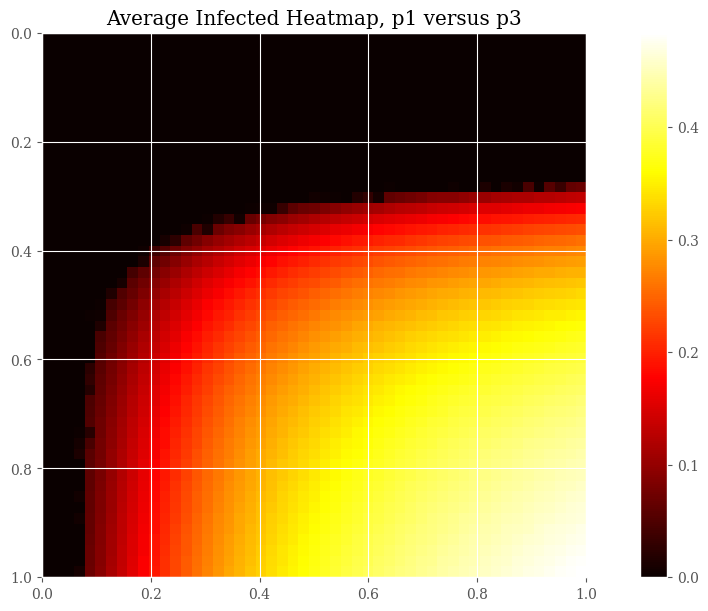

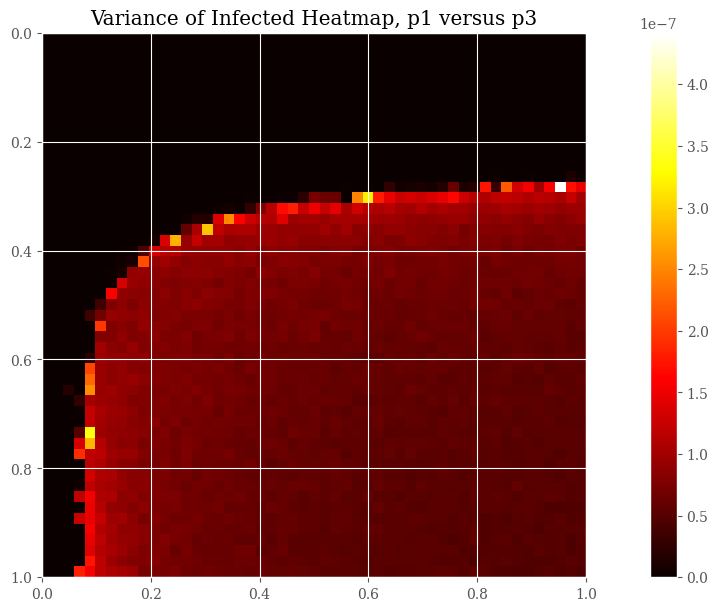

In [14]:
p1 = np.linspace(0,1.0,51)
p3 = np.linspace(0,1.0,51)
print(p3)
avg_i = np.reshape(np.array(prob_i_df['avg_i'], dtype = float), (51,51))

var_i = np.reshape(np.array(prob_i_df['var_i'], dtype = float), (51,51))


plt.contour(p1, p3, avg_i, 115)
plt.colorbar()
plt.xlabel('P1')
plt.ylabel('P3')
plt.show()

plt.contour(p1, p3, var_i, 115)
plt.colorbar()
plt.xlabel('P1')
plt.ylabel('P3')
plt.show()

plt.imshow(avg_i,cmap='hot', interpolation='nearest', extent=[0,1,1,0])
plt.colorbar()
plt.title('Average Infected Heatmap, p1 versus p3')
plt.show()

plt.imshow(var_i,cmap='hot', interpolation='nearest', extent=[0,1,1,0])
plt.colorbar()
plt.title('Variance of Infected Heatmap, p1 versus p3')
plt.show()

# Long Run SIRS

In [23]:
files_long = os.listdir('output-sirs-long/')
print(files_long)

long_df = pd.DataFrame(index = range(len(files_long)), columns = ['p1', 'var_i', 'del_avg_i'])
for i, file in enumerate(files_long):
    array =np.load(f"output-sirs-long/{file}")/2500
    y = variance(array)
    long_df.iloc[i]['var_i'] = y
    long_df.iloc[i]['p1'] = float(file.split('.npy')[0].split('-')[-2])
    long_df.iloc[i]['del_avg_i'] = bootstrap(array, variance, y)

long_df = long_df.sort_values('p1')

['infected-long-0.26-5.npy', 'infected-long-0.215-3.npy', 'infected-long-0.47-4.npy', 'infected-long-0.425-3.npy', 'infected-long-0.41-2.npy', 'infected-long-0.335-3.npy', 'infected-long-0.5-5.npy', 'infected-long-0.5-4.npy', 'infected-long-0.335-2.npy', 'infected-long-0.41-3.npy', 'infected-long-0.425-2.npy', 'infected-long-0.47-5.npy', 'infected-long-0.215-2.npy', 'infected-long-0.26-4.npy', 'infected-long-0.26-6.npy', 'infected-long-0.215-0.npy', 'infected-long-0.47-7.npy', 'infected-long-0.425-0.npy', 'infected-long-0.455-9.npy', 'infected-long-0.41-1.npy', 'infected-long-0.335-0.npy', 'infected-long-0.5-6.npy', 'infected-long-0.5-7.npy', 'infected-long-0.335-1.npy', 'infected-long-0.41-0.npy', 'infected-long-0.425-1.npy', 'infected-long-0.455-8.npy', 'infected-long-0.47-6.npy', 'infected-long-0.215-1.npy', 'infected-long-0.26-7.npy', 'infected-long-0.215-5.npy', 'infected-long-0.26-3.npy', 'infected-long-0.35-9.npy', 'infected-long-0.365-9.npy', 'infected-long-0.47-2.npy', 'infect

In [46]:
p1 = long_df['p1'].unique()
var_long = long_df['var_i'].to_numpy()
mean_var = np.zeros(21)
std_var = np.zeros(21)

for i in range(21):
    mean_var[i] = np.average(var_long[10*i:10 + 10*i])
    std_var[i] = np.std(var_long[10*i:10 + 10*i])

print(mean_var)

[0.00000000e+00 0.00000000e+00 3.21537760e-10 7.56631520e-10
 1.01360570e-08 1.36316469e-07 9.28631710e-07 1.71814698e-05
 4.06057563e-04 2.73592779e-04 2.46050533e-04 2.26777252e-04
 2.15662593e-04 2.03520068e-04 1.98450184e-04 1.90791554e-04
 1.85490048e-04 1.81637712e-04 1.80014603e-04 1.74462804e-04
 1.71648745e-04]


[]

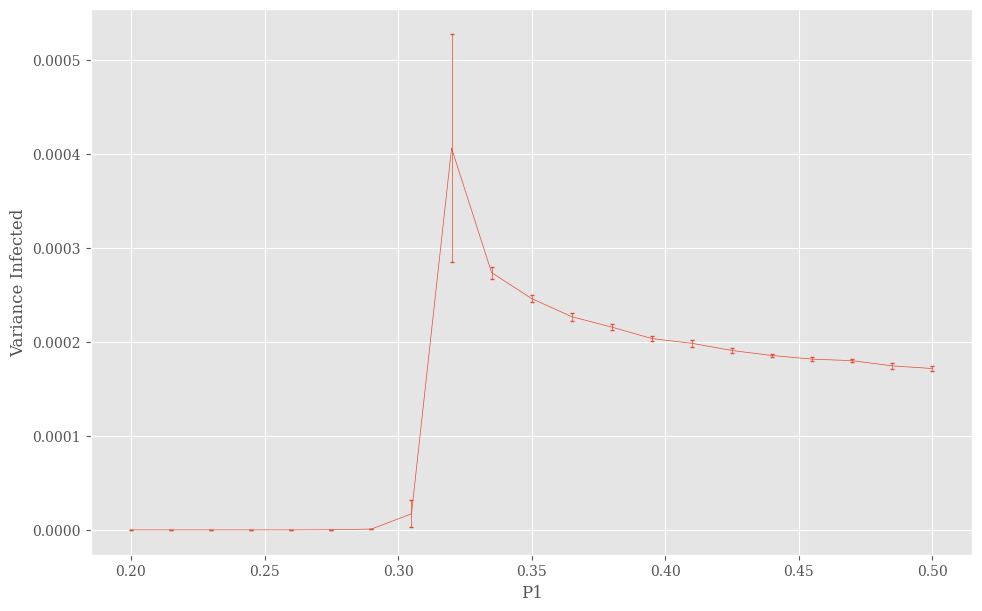

In [48]:
plt.errorbar(np.linspace(0.2,0.5,21), mean_var, yerr = std_var)
plt.xlabel('P1')
plt.ylabel('Variance Infected')
plt.plot()

# Vaccinated SIRS

In [18]:
files_vacc = os.listdir('output-sirs-vacc/')

vacc_df = pd.DataFrame(index = range(len(files_vacc)), columns = ['vacc/N', 'avg_i'])
for i, file in enumerate(files_vacc):
    vacc_df.iloc[i]['avg_i'] = np.average(np.load(f"output-sirs-vacc/{file}")/2500)
    vacc_df.iloc[i]['vacc/N'] = float(file.split('.')[0].split('_')[1])

vacc_df.sort_values('vacc/N')

,vacc/N,avg_i
86,0.0,0.254493
12,10.0,0.252324
161,20.0,0.249164
151,30.0,0.249031
119,40.0,0.246258
...,...,...
24,1760.0,0.0
13,1770.0,0.0
175,1780.0,0.0
136,1790.0,0.0


[]

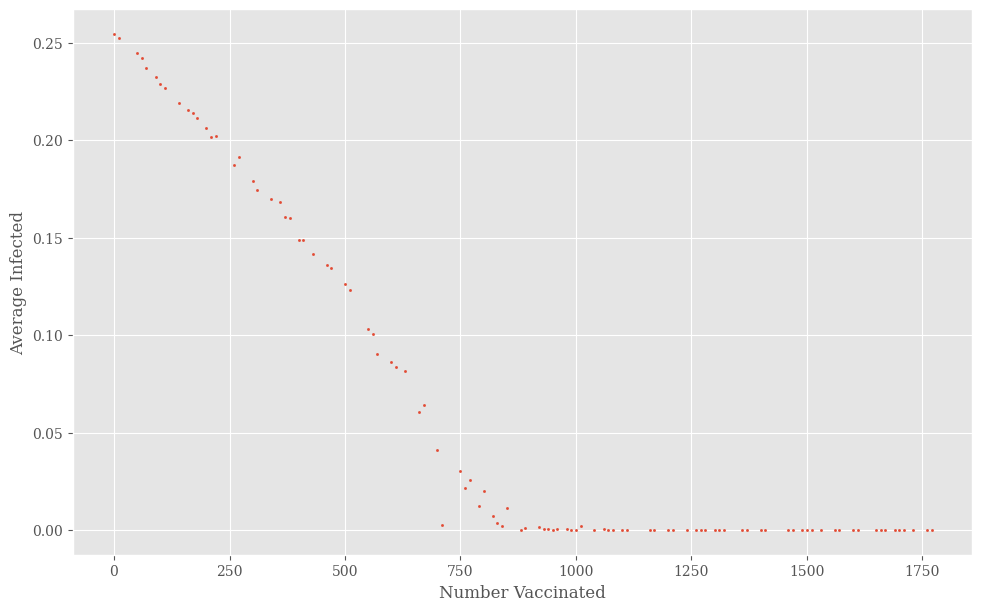

In [19]:
plt.scatter(vacc_df['vacc/N'][:100], vacc_df['avg_i'][:100])
plt.xlabel('Number Vaccinated')
plt.ylabel('Average Infected')
plt.plot()

(90,)


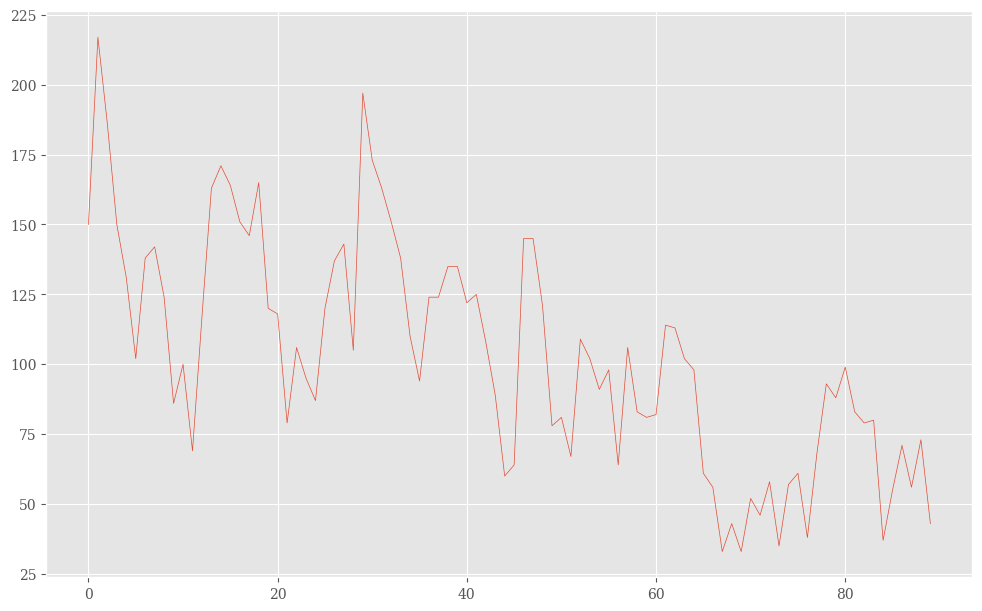

In [20]:
test = np.load('output-sirs-vacc/infected_700.npy')
print(test.shape)
plt.plot(np.linspace(0,test.shape[0]-1,test.shape[0]), test)
plt.show()